# Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Wrangling

## Gathering Data

In [2]:
df = pd.read_excel('Bone-Drilling-Data.xlsx')
df.columns = ['number', 'layer', 'periode', 'x', 'y', 'z']
df

,number,layer,periode,x,y,z
0,2,Layer1,0.0002,0.060684,0.081826,-0.123944
1,3,Layer1,0.0003,0.020763,0.055368,-0.144385
2,4,Layer1,0.0004,-0.027306,0.030179,-0.153339
3,5,Layer1,0.0005,-0.062263,-0.002259,-0.141035
4,6,Layer1,0.0006,-0.070618,-0.029059,-0.113784
...,...,...,...,...,...,...
149994,149996,Layer3,0.9996,-2.365421,4.564792,-5.917724
149995,149997,Layer3,0.9997,-0.513310,-3.619739,8.536880
149996,149998,Layer3,0.9998,0.141672,2.093925,2.878214
149997,149999,Layer3,0.9999,0.740609,-2.166540,5.911083


In [3]:
df = df.drop(['number'], axis=1)
df

,layer,periode,x,y,z
0,Layer1,0.0002,0.060684,0.081826,-0.123944
1,Layer1,0.0003,0.020763,0.055368,-0.144385
2,Layer1,0.0004,-0.027306,0.030179,-0.153339
3,Layer1,0.0005,-0.062263,-0.002259,-0.141035
4,Layer1,0.0006,-0.070618,-0.029059,-0.113784
...,...,...,...,...,...
149994,Layer3,0.9996,-2.365421,4.564792,-5.917724
149995,Layer3,0.9997,-0.513310,-3.619739,8.536880
149996,Layer3,0.9998,0.141672,2.093925,2.878214
149997,Layer3,0.9999,0.740609,-2.166540,5.911083


# Cleaning Data

In [32]:
def check_nan_null(dataframe):
  if dataframe.isnull().values.any() == True:
      print("DataFrame contains NaN or null values.")
  else:
      print("DataFrame does not contain any NaN or null values.")

In [33]:
check_nan_null(df)

DataFrame does not contain any NaN or null values.


# Feature Engineering

## Time-domain Feature Extraction

In [9]:
dimension = df.iloc[:, 1:4].values

In [10]:
from scipy.stats import kurtosis

extracted_features = np.zeros((len(df), 1))

for x in range(len(extracted_features)):
  extracted_features[x] = kurtosis(dimension[x])

In [11]:
extracted_features = pd.DataFrame(extracted_features)
extracted_features = extracted_features.rename(columns = {0:'kurt'})
extracted_features

,kurt
0,-1.5
1,-1.5
2,-1.5
3,-1.5
4,-1.5
...,...
149994,-1.5
149995,-1.5
149996,-1.5
149997,-1.5


In [12]:
# array 'dimension' dikembalikan ke bentuk dataframe
dimension = pd.DataFrame(dimension)
dimension = dimension.rename(columns = {0:'x', 1:'y', 2:'z'})

In [13]:
extracted_features['mean'] = dimension.mean(axis=1)
extracted_features['rms'] = np.sqrt(np.mean(dimension ** 2, axis=1))
extracted_features['std'] = dimension.std(axis=1)
extracted_features['var'] = dimension.var(axis=1)
extracted_features['skew'] = dimension.skew(axis=1)
extracted_features['crest_factor'] = dimension.max(axis=1) / extracted_features['rms']
extracted_features['shape_factor'] = extracted_features['rms'] / extracted_features['mean']

In [14]:
extracted_features

,kurt,mean,rms,std,var,skew,crest_factor,shape_factor
0,-1.5,0.047570,0.058816,0.042364,0.001795,-1.259522,1.391212,1.236416
1,-1.5,0.025477,0.034141,0.027835,0.000775,0.740240,1.621749,1.340068
2,-1.5,0.001091,0.023499,0.028749,0.000826,0.108099,1.284290,21.538569
3,-1.5,-0.021341,0.035972,0.035467,0.001258,-1.720267,0.013900,-1.685625
4,-1.5,-0.033026,0.044090,0.035774,0.001280,-0.492827,0.013609,-1.335011
...,...,...,...,...,...,...,...,...
149994,-1.5,1.066324,3.023891,3.465588,12.010302,0.086607,1.509576,2.835809
149995,-1.5,-1.044450,2.188256,2.355077,5.546386,-0.963263,0.456848,-2.095129
149996,-1.5,1.078466,1.342162,0.978501,0.957464,0.359435,1.560114,1.244510
149997,-1.5,-0.142010,1.442474,1.758081,3.090848,-1.689762,0.693184,-10.157531


## Frequency-domain Feature Extraction

In [16]:
def frequency_centre(signal):
    return ((signal.diff()*signal).sum()) / (2 * np.pi * np.sum(signal**2))

def mean_square_frequency(signal):
    return  np.sum(signal.diff()**2) / (4 * np.pi**2 * np.sum(signal**2))

def root_mean_square_frequency(signal):
    return  np.sqrt(mean_square_frequency(signal))

def root_variance_frequency(signal):
    return  np.sqrt(mean_square_frequency(signal) - frequency_centre(signal)**2)

# calculate FC, RMSF, and RVF
extracted_features['fc'] = dimension.apply(lambda row: frequency_centre(row[['x', 'y', 'z']]), axis=1)
extracted_features['rmsf'] = dimension.apply(lambda row: root_mean_square_frequency(row[['x', 'y', 'z']]), axis=1)
extracted_features['rvf'] = dimension.apply(lambda row: root_variance_frequency(row[['x', 'y', 'z']]), axis=1)

extracted_features

,kurt,mean,rms,std,var,skew,crest_factor,shape_factor,fc,rmsf,rvf
0,-1.5,0.047570,0.058816,0.042364,0.001795,-1.259522,1.391212,1.236416,0.082818,0.100100,0.056224
1,-1.5,0.025477,0.034141,0.027835,0.000775,0.740240,1.621749,1.340068,0.106544,0.108202,0.018873
2,-1.5,0.001091,0.023499,0.028749,0.000826,0.108099,1.284290,21.538569,0.239362,0.249534,0.070519
3,-1.5,-0.021341,0.035972,0.035467,0.001258,-1.720267,0.013900,-1.685625,0.154655,0.221803,0.158992
4,-1.5,-0.033026,0.044090,0.035774,0.001280,-0.492827,0.013609,-1.335011,0.104297,0.171850,0.136582
...,...,...,...,...,...,...,...,...,...,...,...
149994,-1.5,1.066324,3.023891,3.465588,12.010302,0.086607,1.509576,2.835809,0.229722,0.234104,0.045079
149995,-1.5,-1.044450,2.188256,2.355077,5.546386,-0.963263,0.456848,-2.095129,0.133182,0.145093,0.057572
149996,-1.5,1.078466,1.342162,0.978501,0.957464,0.359435,1.560114,1.244510,0.116809,0.145999,0.087587
149997,-1.5,-0.142010,1.442474,1.758081,3.090848,-1.689762,0.693184,-10.157531,0.155693,0.185926,0.101627


# Train-Test-Split

In [17]:
from sklearn.model_selection import train_test_split

X = extracted_features
y = df.iloc[:, [0]]

In [18]:
df

,layer,periode,x,y,z
0,Layer1,0.0002,0.060684,0.081826,-0.123944
1,Layer1,0.0003,0.020763,0.055368,-0.144385
2,Layer1,0.0004,-0.027306,0.030179,-0.153339
3,Layer1,0.0005,-0.062263,-0.002259,-0.141035
4,Layer1,0.0006,-0.070618,-0.029059,-0.113784
...,...,...,...,...,...
149994,Layer3,0.9996,-2.365421,4.564792,-5.917724
149995,Layer3,0.9997,-0.513310,-3.619739,8.536880
149996,Layer3,0.9998,0.141672,2.093925,2.878214
149997,Layer3,0.9999,0.740609,-2.166540,5.911083


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 137)

# Model Development

## Validation Curves

### n_estimators

In [20]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier

param_range = [100, 300, 500, 750, 800, 1200]
# np.arange(30, 70, 10)

train_scores, test_scores = validation_curve(
                          RandomForestClassifier(),
                          X = X_train, y = y_train,
                          param_name = 'n_estimators',
                          param_range = param_range, cv = 3,
                          scoring="accuracy", n_jobs=-1)

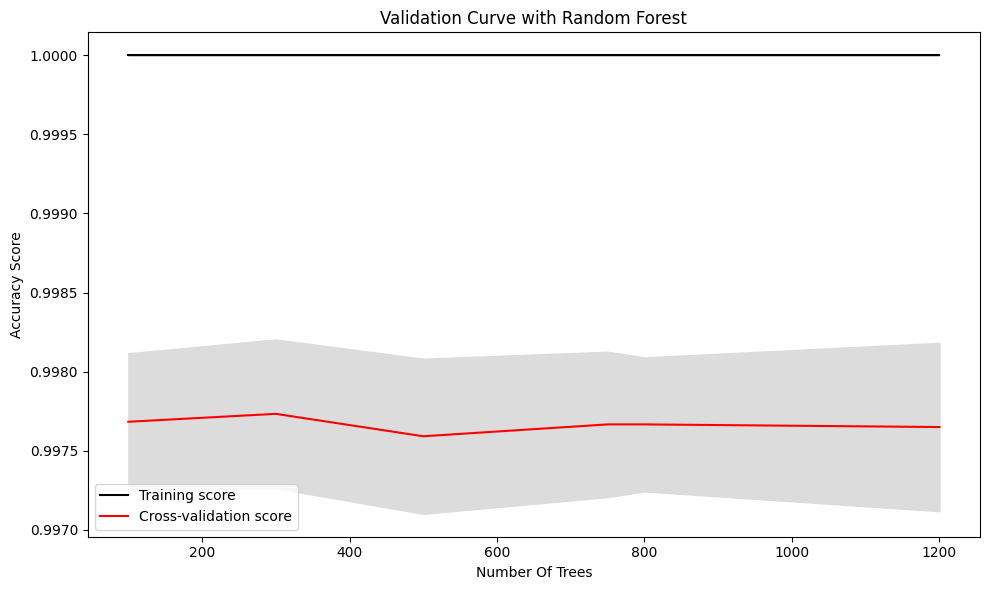

In [21]:
# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.subplots(1, figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")

# Plot accuracy bands for training and test sets
plt.fill_between(param_range,
                 train_mean - train_std,
                 train_mean + train_std, color="gray")
plt.fill_between(param_range,
                 test_mean - test_std,
                 test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve with Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

### max_depth

In [22]:
param_range = [5, 10, 15, 20, 25, 30]

train_scores, test_scores = validation_curve(
                          RandomForestClassifier(),
                          X = X_train, y = y_train,
                          param_name = 'max_depth',
                          param_range = param_range, cv = 3,
                          scoring="accuracy", n_jobs=-1)

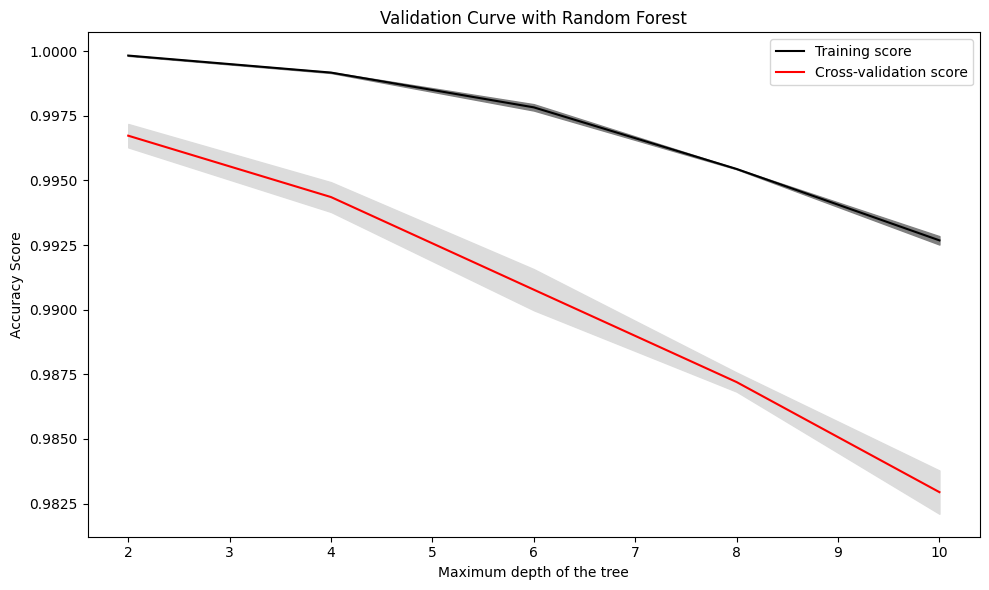

In [34]:
# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.subplots(1, figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")

# Plot accuracy bands for training and test sets
plt.fill_between(param_range,
                 train_mean - train_std,
                 train_mean + train_std, color="gray")
plt.fill_between(param_range,
                 test_mean - test_std,
                 test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve with Random Forest")
plt.xlabel("Maximum depth of the tree")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

### min_samples_split

In [24]:
param_range = [2, 4, 6, 8, 10]

train_scores, test_scores = validation_curve(
                          RandomForestClassifier(),
                          X = X_train, y = y_train,
                          param_name = 'min_samples_split',
                          param_range = param_range, cv = 3,
                          scoring="accuracy", n_jobs=-1)

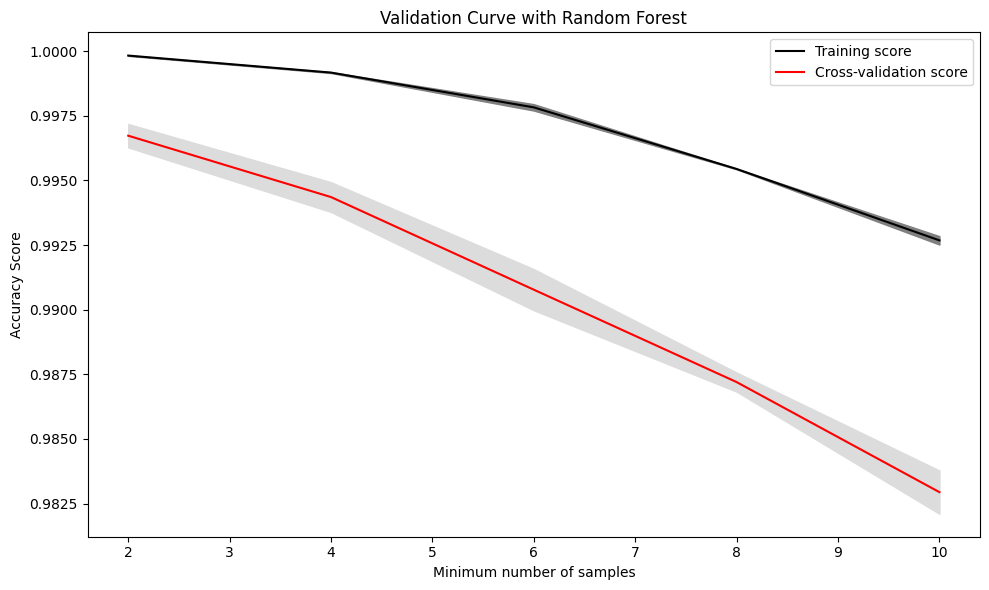

In [35]:
# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.subplots(1, figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")

# Plot accuracy bands for training and test sets
plt.fill_between(param_range,
                 train_mean - train_std,
                 train_mean + train_std, color="gray")
plt.fill_between(param_range,
                 test_mean - test_std,
                 test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve with Random Forest")
plt.xlabel("Minimum number of samples")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

### min_samples_leaf

In [26]:
param_range = [2, 4, 6, 8, 10]

train_scores, test_scores = validation_curve(
                          RandomForestClassifier(),
                          X = X_train, y = y_train,
                          param_name = 'min_samples_leaf',
                          param_range = param_range, cv = 3,
                          scoring="accuracy", n_jobs=-1)

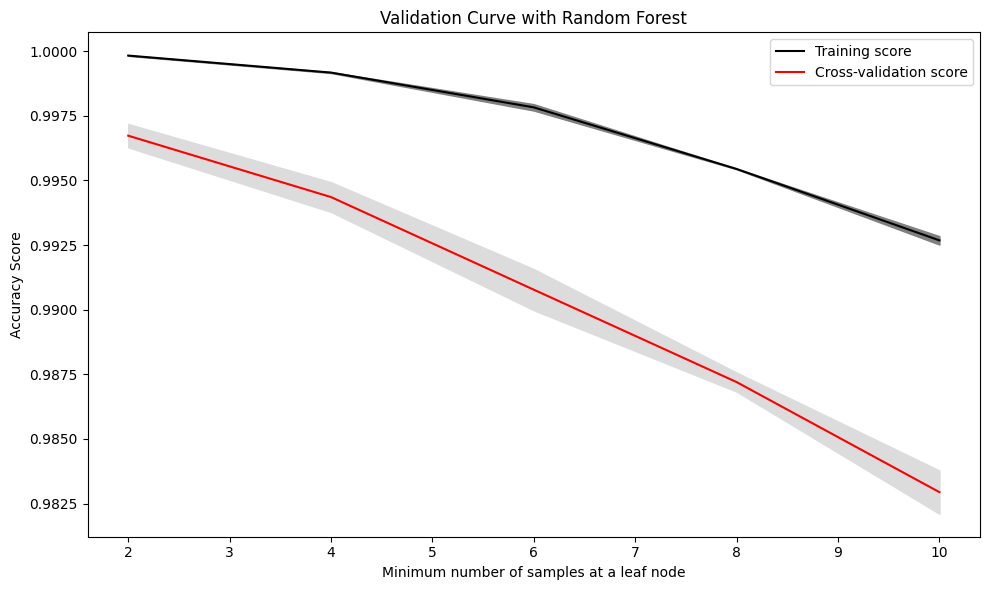

In [36]:
# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.subplots(1, figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")

# Plot accuracy bands for training and test sets
plt.fill_between(param_range,
                 train_mean - train_std,
                 train_mean + train_std, color="gray")
plt.fill_between(param_range,
                 test_mean - test_std,
                 test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve with Random Forest")
plt.xlabel("Minimum number of samples at a leaf node")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RF = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=4, min_samples_leaf=2)
model = RF.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training accuracy: ", model.score(X_train, y_train))
print("Testing accuracy: ", accuracy_score(y_pred, y_test))

C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy:  0.9991749931249427
Testing accuracy:  0.9978


## Confusion Matrix

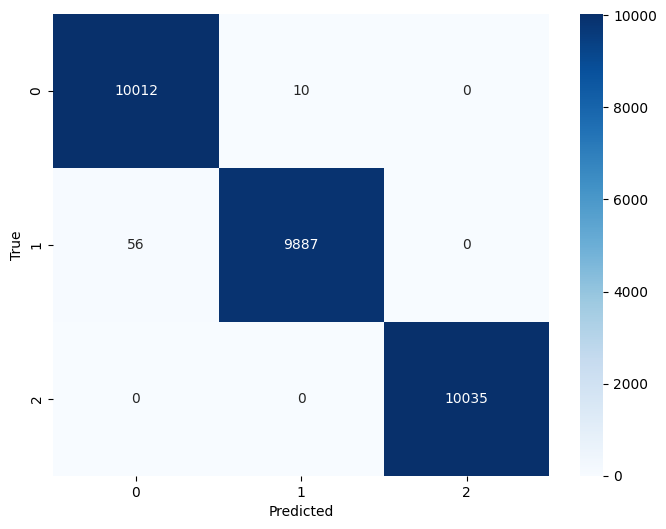

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
